# Estimate Pi

I saw an interview question on Reddit that said, "Given a function that randomly generates a number between 0 and 1, estimate Pi".  The question seems fun just from the question's construction alone.  So here goes...

### Explanation

Pi makes me think of circles, and I know the formula for the Area of a circle.  With a sampling, I can estimate the area of a circle.  The function can generate points from 0 to 1, so I will use a circle with a radius of 1, or more precisely a quarter of a circle.

I'll use the function to generate 2 random numbers between 0, 1.  These will be coordinates for a point (x,y).  If the point is less than a distance of 1 unit away, then it is inside the circle. We can estimate Pi using the ratio of points inside the circle to total points.

Some formulas
- Area of Shaded Arc = (Pi * r^2 ) / 4 
- We can use the ratio of num_sampes_in_shaded_area to num_samples_total to estimate the Area, so we end up with (Pi * r^2 ) / 4 = (num_sampes_in_shaded_area / num_samples_total)
    - Using with r=1, we can reduce to **Pi = 4 * (num_sampes_in_shaded_area / num_samples_total)**
    - num_sampes_in_shaded_area simply means the point's distance from origin is less than or equal to 1, Distance from origin = sqrt(x^2 * y°2)

If we use enough samples, we should get close to Pi.

See the image below for an illustration.

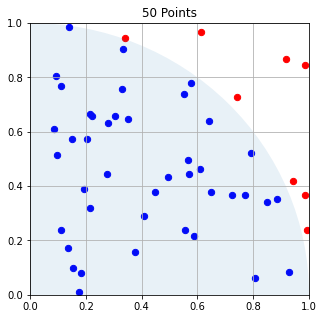

In [10]:
import numpy as np
import math
from random import uniform
import time

import matplotlib.patches as patches
import matplotlib.pyplot as plt

distance_from_origin = lambda x,y: math.sqrt(x**2 + y**2)
is_inside_circle = lambda x,y: distance_from_origin(x,y) <= 1

# generate 50 data points (x,y) for visualization purposes.
x_y_points = [(uniform(0,1), uniform(0,1)) for _ in range(50)]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

# draw arc
e1 = patches.Circle((0, 0), 1, alpha=0.1)
ax.add_patch(e1)

# add generated points, color coded.
plt.scatter(
    [t[0] for t in x_y_points if is_inside_circle(t[0], t[1])], 
    [t[1] for t in x_y_points if is_inside_circle(t[0], t[1])], 
    s=40,
    marker='o', 
    c='b'
)
plt.scatter(
    [t[0] for t in x_y_points if not is_inside_circle(t[0], t[1])], 
    [t[1] for t in x_y_points if not is_inside_circle(t[0], t[1])], 
    s=40,
    marker='o', 
    c='r'
)

# set some simple chart options.
ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.0)
ax.set_title('50 Points')

plt.grid()
plt.show()

### Coding It...

In [11]:
round(math.pi,5)

3.14159

Let's see how close we can get with a reasonable enough compute time.

In [12]:
def estimate_pi(n=100):
    '''
    Estimate Pi by sampling.
    
    Parameters:
        n: <int> default: 100
            Number of samples we will make.

    Returns:
        <float> with our estimate of Pi
    '''    

    if not isinstance(n, int):
        raise ValueError('n must be an int')
    
    num_total = 0
    num_in_circle = 0
    
    for _ in range(n):
        if is_inside_circle(uniform(0,1), uniform(0,1)):
            num_in_circle = num_in_circle + 1
        num_total = num_total + 1

    return 4 * num_in_circle / num_total

In [13]:
for x in range(2,9):
    start = time.time()
    pi = estimate_pi(n=10**x)
    end = time.time()
    print(f"{round(pi,5)}\t10^{x} samples, elapsed: {round(end - start,5)} seconds")

3.48	10^2 samples, elapsed: 0.00023 seconds
3.116	10^3 samples, elapsed: 0.002 seconds
3.1424	10^4 samples, elapsed: 0.01706 seconds
3.13848	10^5 samples, elapsed: 0.09749 seconds
3.14143	10^6 samples, elapsed: 0.88967 seconds
3.14212	10^7 samples, elapsed: 9.38504 seconds
3.14158	10^8 samples, elapsed: 92.00807 seconds


Not too bad, but as we get more accurate the computation time takes a looong time.<br>
Can we make it go faster?

In [14]:
def estimate_pi_faster(n=100):
    '''
    Estimate Pi by sampling using numpy vectorization.
    
    Parameters:
        n: <int> default: 100
            Number of samples we will make.

    Returns:
        <float> with our estimate of Pi
    '''

    if not isinstance(n, int):
        raise ValueError('n must be an int')

    is_inside_circle_2 = lambda x,y: distance_from_origin(x,y) <= 1    

    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)
    inside_circle = ((x**2 + y**2) <= 1)
    pi = 4 * np.sum(inside_circle) / n

    return pi

In [19]:
start = time.time()
pi = estimate_pi_faster(n=10**8)
end = time.time()
print(f"{round(pi,5)}\t10^{x} samples, elapsed: {round(end - start,5)} seconds")

3.14183	10^8 samples, elapsed: 4.51296 seconds


... *a little bit ;)*  A ~95% reduction in duration.

In [18]:
# original
%timeit estimate_pi(n=10**8)

1min 34s ± 1.26 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
# faster
%timeit estimate_pi_faster(n=10**8)

3.92 s ± 83.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
